In [6]:
import os

os.environ[
    "OMP_NUM_THREADS"
] = "64"  # for jupyter.nersc.gov otherwise the notebook only uses 2 cores

import seaborn as sns

sns.set_context("talk")
# sns.set()
sns.set_style("ticks")

import matplotlib as mpl
mpl.rc('image', cmap='coolwarm')

import matplotlib.pyplot as plt

%matplotlib inline

from os.path import join as opj

import healpy as hp
import numpy as np

from lenspyx import synfast
from lenspyx.utils import camb_clfile

import plancklens
from plancklens import utils

In [7]:
from utility import bin_cell

In [8]:
import time
from tqdm import tqdm

In [9]:
import lensre
from importlib import reload
reload(lensre)
from lensre import run_qe

Using lenspyx alm2map


In [136]:
import utility
reload(utility)
from utility import plot_errors_from_mf, w

In [11]:
import pymaster as nmt

In [12]:
cls_path = '/global/homes/j/jianyao/non_gau_lensing/theory/cls/'

In [13]:
cl_unl = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))
cl_len = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lensedCls.dat'))
#: Fiducial unlensed and lensed power spectra used for the analysis.

cl_weight = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lensedCls.dat'))
cl_weight['bb'] *= 0.
#: CMB spectra entering the QE weights (the spectra multplying the inverse-variance filtered maps in the QE legs) 

In [14]:
from binning import binning, multipole_binning

# errors for each foreground case

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_600


100%|██████████| 300/300 [00:39<00:00,  7.55it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_600


100%|██████████| 300/300 [00:39<00:00,  7.52it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_Gaussiand9_lmin_100_lmax_2000_p_eb_lmax_Bmode_600


100%|██████████| 300/300 [00:42<00:00,  7.01it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_600


100%|██████████| 300/300 [00:44<00:00,  6.78it/s]


plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


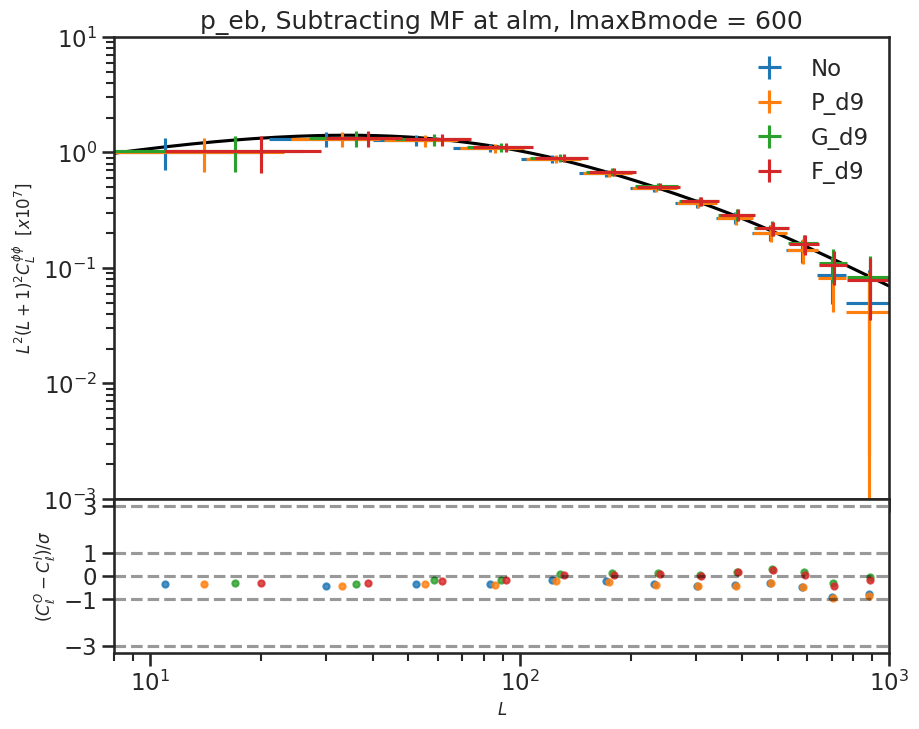

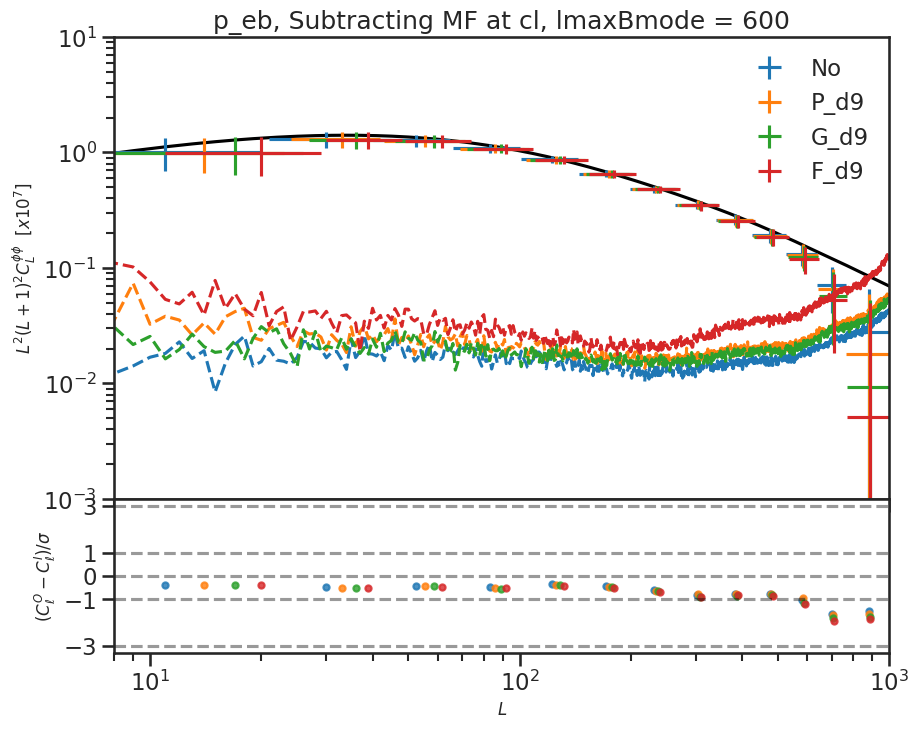

In [12]:
cases = ['no_fore', 'd9', 'forse3_Gaussiand9', 'forse3_d9']
# cases = ['forse3_d9']
lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 600
results_all_2000 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = [200, 500], lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment='SO_LAT_MASK')
plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, plot_mf_cl=True)

In [108]:
cases = ['no_fore', 'd9', 'forse3_Gaussiand9', 'forse3_d9']

lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 2000
results_all_2000 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = [200, 500], lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment='SO_LAT_MASK')

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [00:32<00:00,  9.31it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [00:32<00:00,  9.21it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_Gaussiand9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [00:32<00:00,  9.11it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [00:34<00:00,  8.79it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:12<00:00,  4.11it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:13<00:00,  4.11it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_Gaussiand9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:16<00:00,  3.93it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:15<00:00,  3.97it/s]


plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


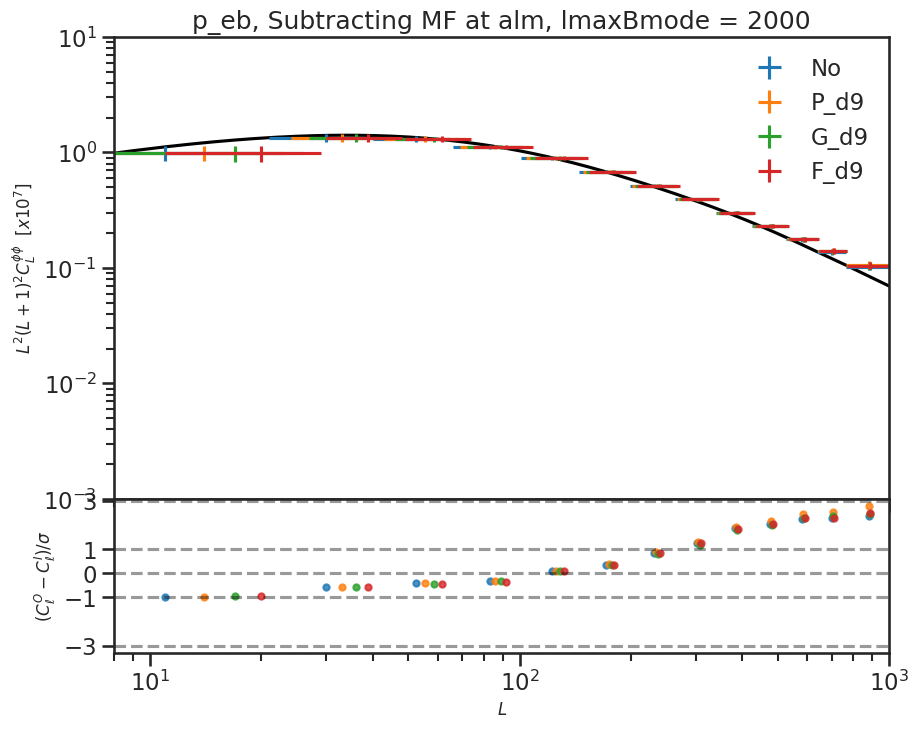

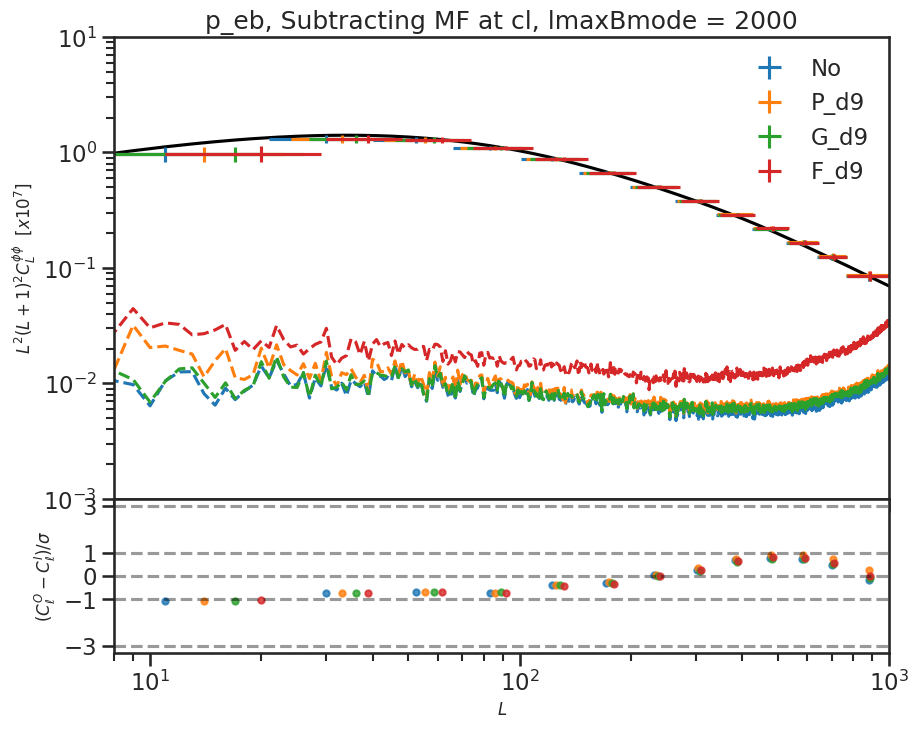

In [8]:
plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, plot_mf_cl=True)

## toshiyan binning

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


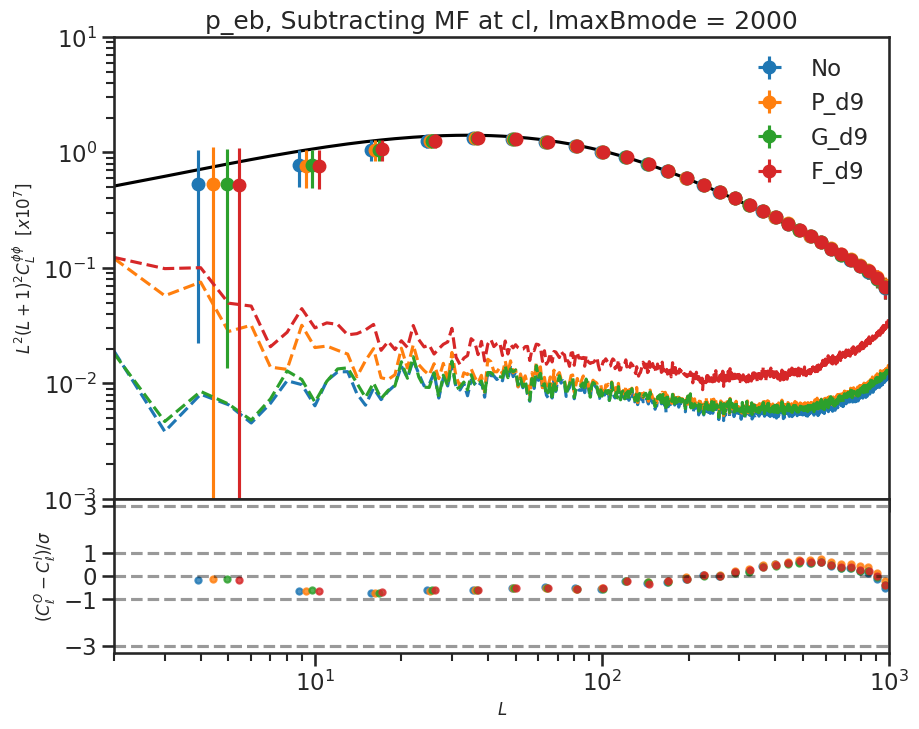

In [137]:
binner = multipole_binning(n = 30,lmin=2,lmax=998,spc='p2')
cl_binned = binning(cl_unl['pp'][ell_all]*w(ell_all),binner)
data_error = plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=True, binning = ['toshiyan', binning, binner], true_binned=cl_binned)

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


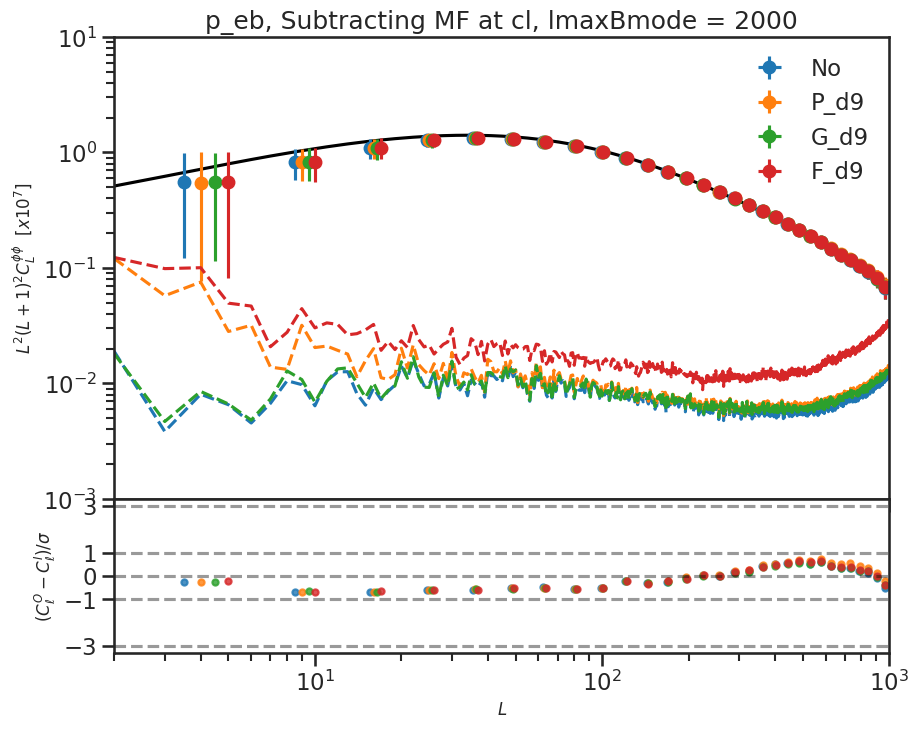

In [138]:
# bins = [8, 21, 40, 66, 101, 145, 199, 264, 339, 426, 526, 638, 763, 902, 1000-1]
bins = list(binner.bp)
bins = [round(i) for i in bins]
ell = np.arange(1000)
ell_binned, true_binned_my =  bin_cell(cl_unl['pp'][ell]* w(ell), lmax = bins[-1], bins = bins, ell_2=False)    

data_error_my = plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=True, binning = ['my', utility.bin_cell, bins], true_binned=true_binned_my)

# errors for model mismatch 

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:15<00:00,  3.98it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:14<00:00,  4.01it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_Gaussiand9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:15<00:00,  3.96it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:19<00:00,  3.79it/s]


plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


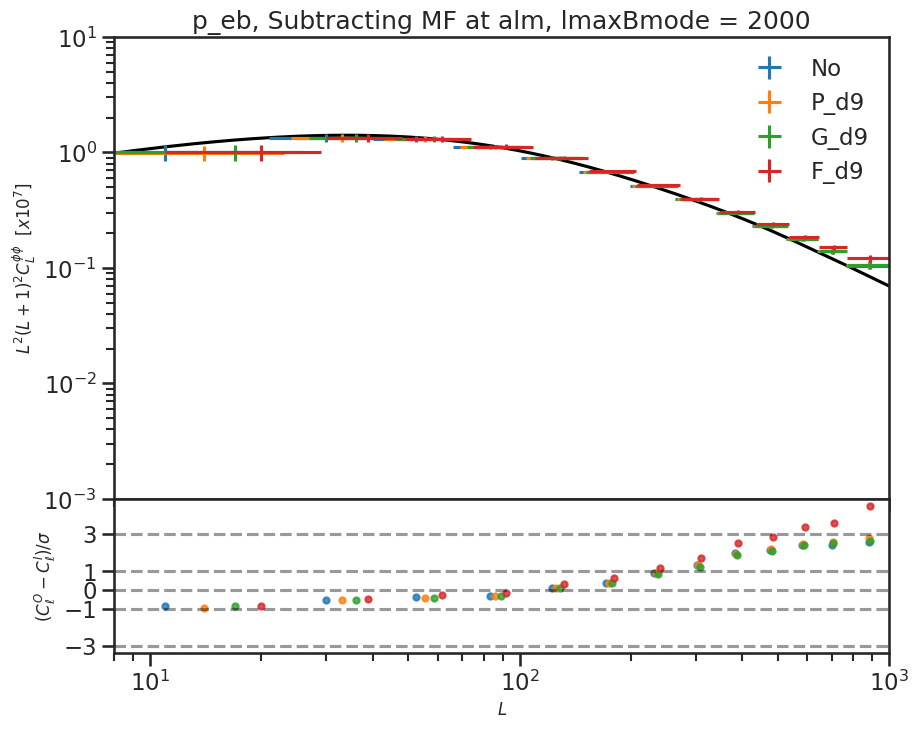

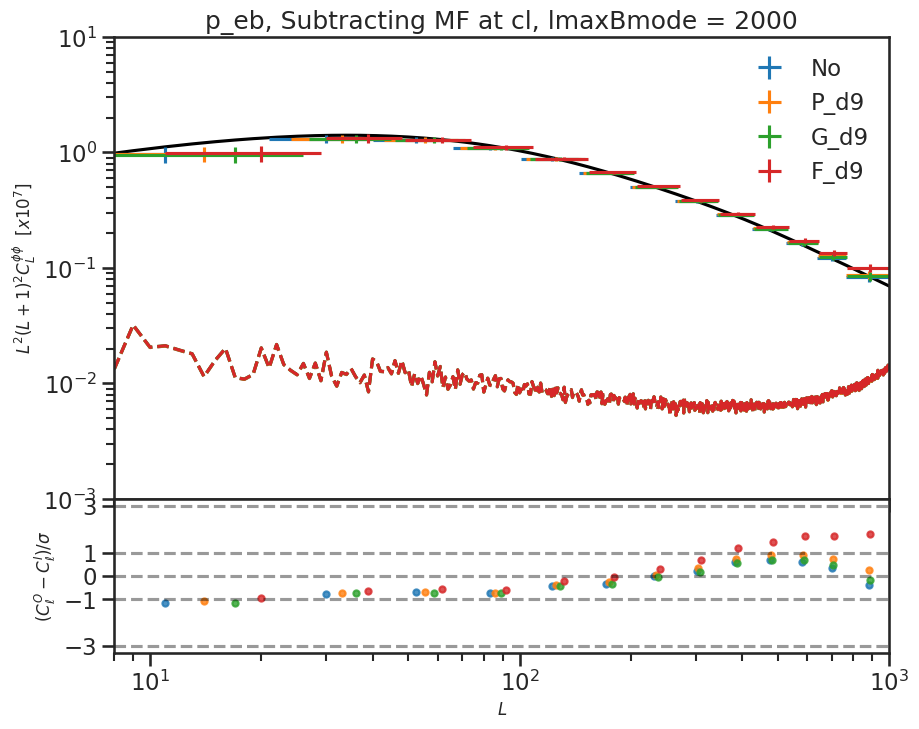

In [8]:
cases = ['no_fore', 'd9', 'forse3_Gaussiand9', 'forse3_d9']

lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 2000
results_all_2000 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = [200, 500], lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment='SO_LAT_MASK')
plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, plot_mf_cl=True, add_foreground='d9')

In [9]:
mfs = np.loadtxt('mean_filed_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000.dat', skiprows=1)

Text(0, 0.5, 'ratio to no_fore')

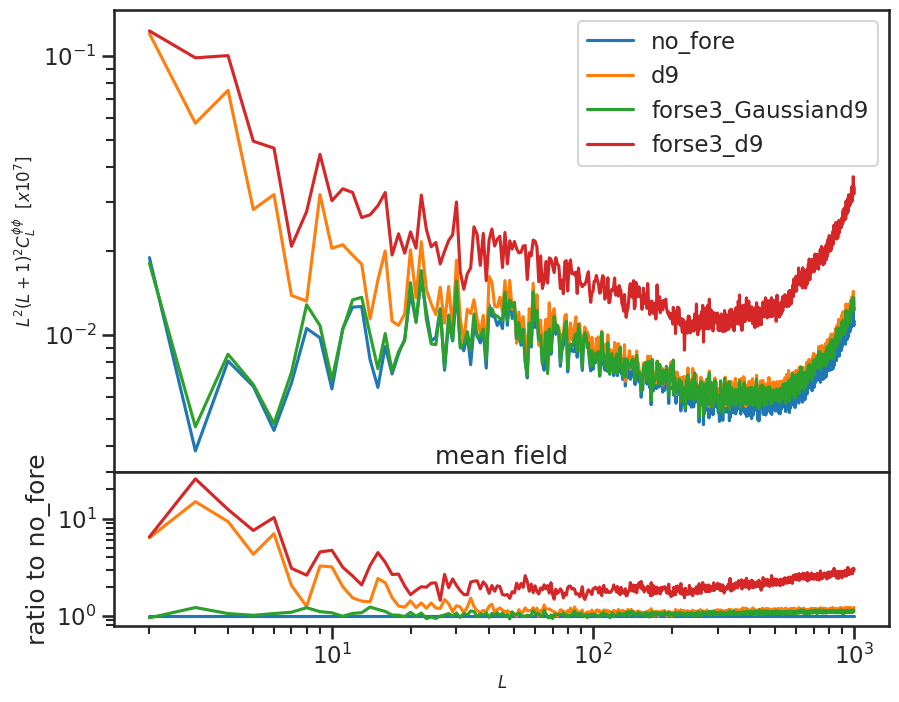

In [26]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize = (10, 8),  gridspec_kw={'height_ratios':[3,1]})
plt.title('mean field')
for i in range(1, 5):
    axes[0].loglog(mfs[:, 0], mfs[:, i], label = cases[i-1])
axes[0].legend()
axes[0].set_ylabel('$L^2 (L + 1)^2 C_L^{\phi\phi}$  [$x10^7$]', fontsize=12)
axes[1].set_xlabel('$L$', fontsize=12)
fig.subplots_adjust(hspace=0)
for i in range(1, 5):
    axes[1].loglog(mfs[:, 0], mfs[:, i]/mfs[:, 1], label = cases[i-1])
    
axes[1].set_ylabel('ratio to no_fore')

# test for no_fore 

In [46]:
cases = ['no_fore']

lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 2000
results_all_2000 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = [200, 500], lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment='SO_LAT_MASK')
# plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, plot_mf_cl=True)

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [00:34<00:00,  8.82it/s]


In [106]:
import utility
reload(utility)
from utility import plot_errors_from_mf, bin_cell

In [104]:
len(bins)

31

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


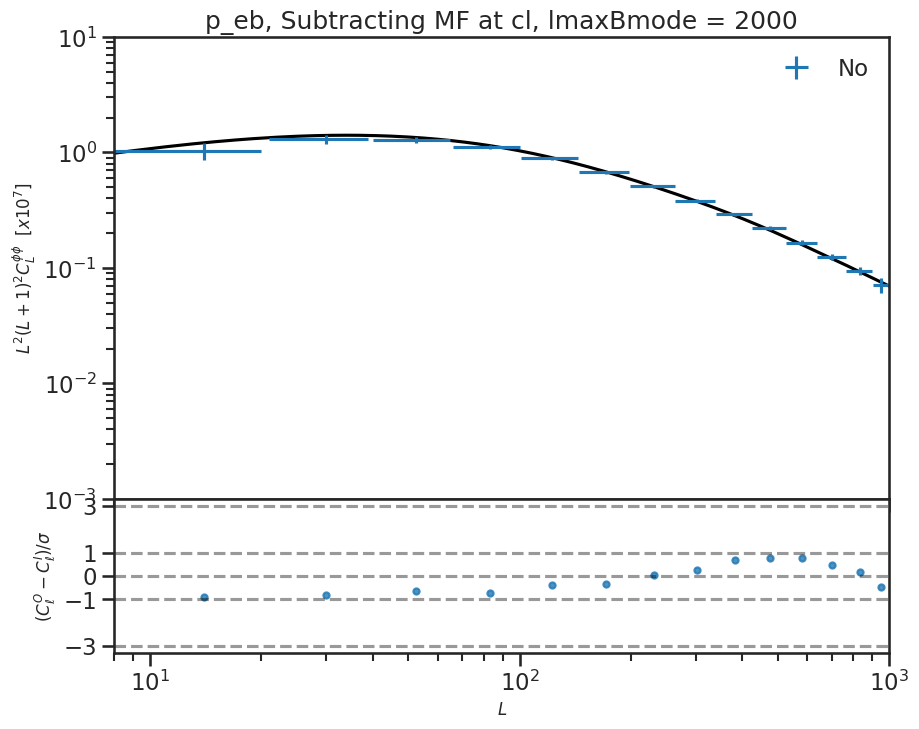

In [240]:
ell = np.arange(1000)
ell_binned, true_binned_my =  bin_cell(cl_unl['pp'][ell]* w(ell), lmax = bins[-1], bins = bins, ell_2=False)    

data_error_my = plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=True, binning = ['my', utility.bin_cell], true_binned=true_binned_my)

In [237]:
ell_binned, true_binned =  my_binner._get_binnedcl(cl_unl['pp'][ell_all])

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


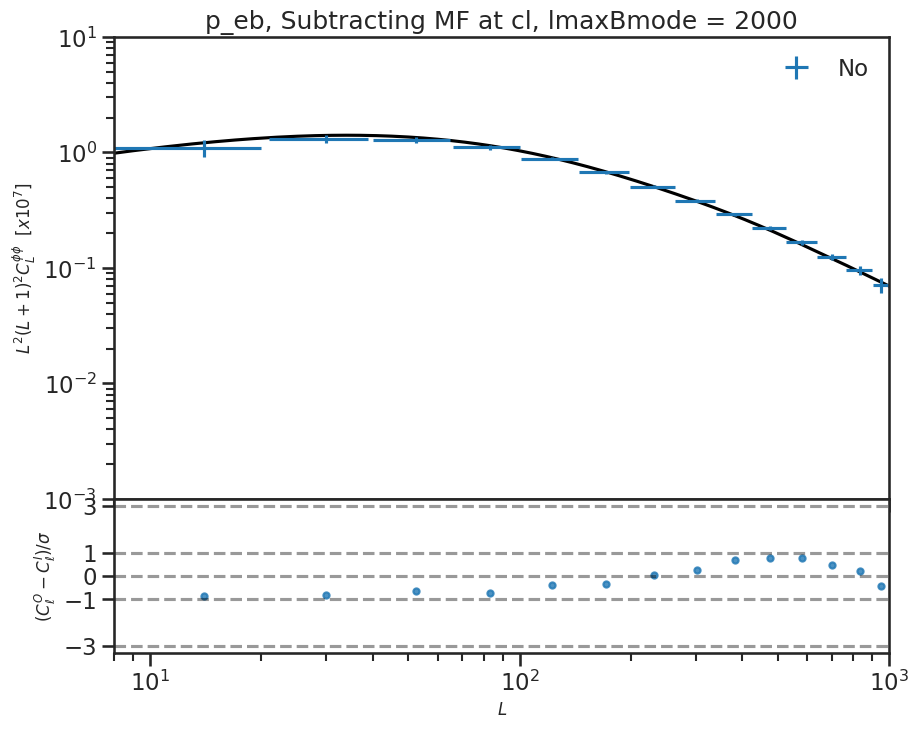

In [238]:
data_error = plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=True, binning = ['planck', my_binner._get_binnedcl], true_binned=true_binned)

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


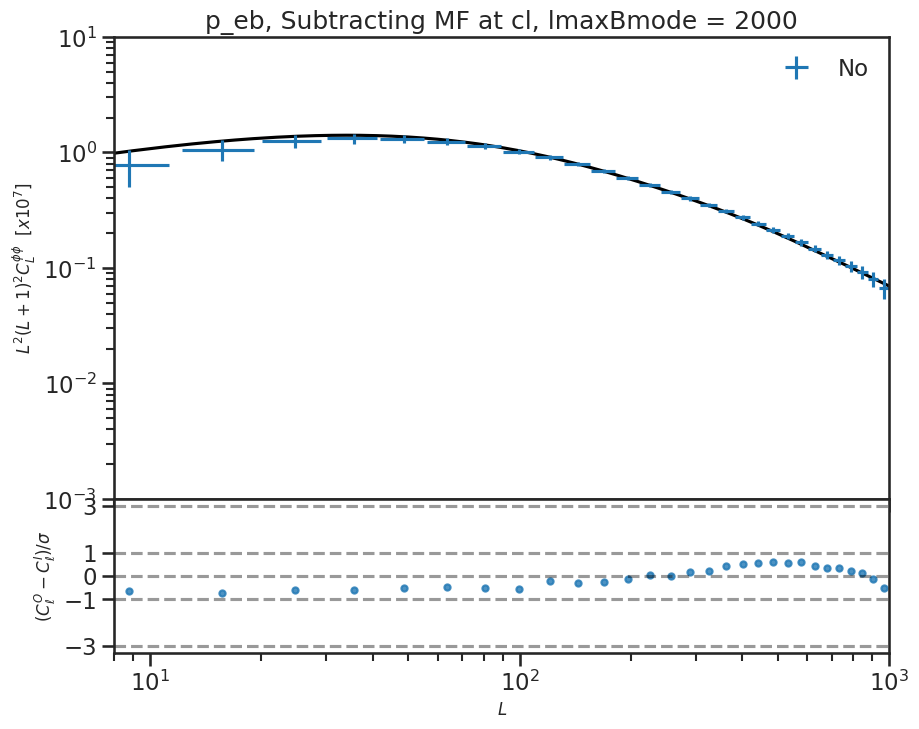

In [65]:
binner = multipole_binning(n = 30,lmin=2,lmax=998,spc='p2')
cl_binned = binning(cl_unl['pp'][ell_all]*w(ell_all),binner)
data_error = plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=True, binning = ['toshiyan', binning, binner], true_binned=cl_binned)

# phi

In [17]:
ell = np.arange(2, 1000)
ell_all = np.arange(1000)

In [18]:
mask = hp.read_map('/pscratch/sd/j/jianyao/data_lensing/SO_LAT_mask_1024.fits')
phi_dir = '/pscratch/sd/j/jianyao/data_lensing/simulations/phi_alms/'
fl = ell*(ell+1)/2
cl_phi_new = []
for i in range(100):

    phi_name = phi_dir + 'phi_%04d.fits'%i
    plm = hp.read_alm(phi_name)
    
    klm = hp.almxfl(plm,fl)
    kmap = hp.alm2map(klm,nside=1024)*mask

    klm_n = hp.map2alm(kmap)
    plm_n = hp.almxfl(klm_n,1/fl)
    cl_i = (hp.alm2cl(plm_n)/0.45906)[ell_all]#*w(ell_all)
    cl_phi_new.append(cl_i)

In [42]:
binner = multipole_binning(n = 30,lmin=2,lmax=998,spc='p2')
cl_binnd = binning(cl_unl['pp'],binner)

In [43]:
binner.bc

array([  3.92846873,   8.79723594,  15.68966263,  24.6057488 ,
        35.54549447,  48.50889961,  63.49596425,  80.50668836,
        99.54107197, 120.59911505, 143.68081763, 168.78617969,
       195.91520123, 225.06788226, 256.24422278, 289.44422278,
       324.66788226, 361.91520123, 401.18617969, 442.48081763,
       485.79911505, 531.14107197, 578.50668836, 627.89596425,
       679.30889961, 732.74549447, 788.2057488 , 845.68966263,
       905.19723594, 966.72846873])

In [20]:
cl_phi_norm = []
for i in range(100):
    cl_phi_norm.append(cl_phi_new[i]*w(ell_all))

In [131]:
cl_phi_mean = np.mean(cl_phi_new, axis = 0)
cl_phi_std = np.std(cl_phi_new, axis = 0)

In [150]:
cl_phi_mean_bin_after = bin1.bin_cell(cl_phi_mean)
cl_phi_std_bin_after = bin1.bin_cell(cl_phi_std)

In [132]:
cl_phi_mean.shape

(1000,)

In [146]:
bin1 = nmt.NmtBin.from_lmax_linear(999, 20)
eff = bin1.get_effective_ells()

In [44]:
# bins = [2, 21, 40, 66, 101, 145, 199, 264, 339, 426, 526, 638, 763, 1000]
# bins = list(np.arange(2, 1000, 40))
cl_phi_binned = [0]*100
for i in range(100):
    # ell_binned, cl_phi_binned[i] = utility.bin_cell(cl_phi_new[i], lmax = 1000, bins = bins, ell_2=False)
    # cl_phi_binned[i] = bin1.bin_cell(cl_phi_new[i])*w(eff)
    # cl_phi_binned[i] = my_binner._get_binnedcl(cl_phi_new[i])
    cl_phi_binned[i] = binning(cl_phi_norm[i], binner)

cl_phi_mean_binned = np.mean(cl_phi_binned, axis = 0)
cl_phi_std_binned = np.std(cl_phi_binned, axis = 0)
# cl_real_binned = bin1.bin_cell(cl_unl['pp'][ell_all])*w(eff)

In [228]:
ell_my, cl_real_binned = my_binner._get_binnedcl(cl_unl['pp'][ell_all])

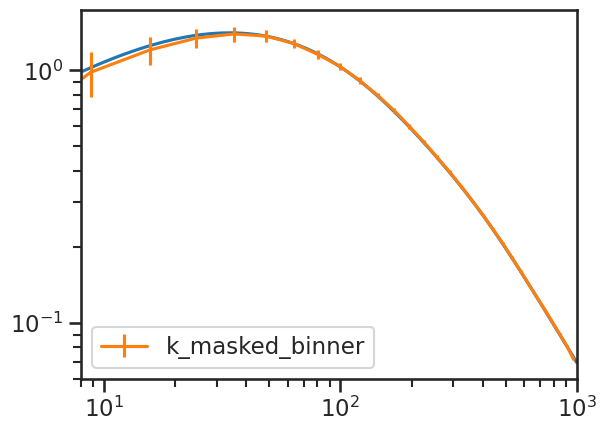

In [45]:

# plt.loglog(ell, cl_phi[ell]*w(ell), label = 'pp')
plt.loglog(ell, cl_unl['pp'][ell]*w(ell))
plt.errorbar(binner.bc, cl_phi_mean_binned, cl_phi_std_binned, label = 'k_masked_binner')
# plt.loglog(eff, cl_real_binned, label ='cl_phiphi_input')
# plt.loglog(ell_my, cl_real_binned, label ='cl_phiphi_input')

# plt.loglog(ell, cl_phi_masked[ell]*w(ell), label = 'p_masked')
# plt.loglog(ell, cl_phi_mean[ell]*w(ell), label = 'k_masked')
# plt.errorbar(ell_my, cl_phi_mean_binned, cl_phi_std_binned, label = 'k_masked_binned')
# plt.errorbar(eff, cl_phi_mean_bin_after, cl_phi_std_bin_after, label = 'k_masked_binned_after')

# plt.errorbar(ell_all, cl_phi_mean, cl_phi_std, label = 'k_masked_binned')

# plt.errorbar(ell, cl_phi_mean, cl_phi_std, label = 'k_masked')

# plt.ylim(1e-3, 10)
plt.xlim(8, 1000)
plt.legend()

In [225]:
# from plancklens.bandpowers import get_blbubc

def get_blbubc(bin_type):
    if bin_type == 'agr2':
        bins_l = np.array([8, 21, 40, 66, 101, 145, 199, 264, 339, 426, 526, 638, 763, 902])
        bins_u = np.array([20, 39, 65, 100, 144, 198, 263, 338, 425, 525, 637, 762, 901, lmax_qlm-1])

    else:
        assert 0, bin_type + ' not implemented'
    return bins_l, bins_u, 0.5 * (bins_l + bins_u)

class ffp10_binner:
    """Band-power construction library using the FFP10 fiducial cosmology.

        This combines lensing (or anisotropy) estimates spectra to build band-powers in the exact same way than
        the Planck 2018 lensing analysis.

        This uses the various QE and QE spectra libraries defined in a parameter file, in particular:
         - *qcls_dd*  (for data band-powers, to build covariance matrix, Monte-Carlo and point-source correction)
         - *qcls_ds*  (for RDN0 and point-source correction)
         - *qcls_ss*  (for MCN0, RDN0, Monte-Carlo and point-source correction)
         - *qresp_dd* (for the estimator normalization)
         - *n1_dd* (for the N1 bias subtraction)
         - *nhl_dd* (to build the semi-analytical covariance matrix)
         - *ivfs* (for the N1 bias and point-source correction)

         In each of the methods defined here (e.g. MCN0, RDN0...),  if the relevant QE, QE spectra, etc cannot be found
         precomputed, this will be performed on the fly. Hence in a realistic configuration it is always advisable
         to build them all previously (for example with *examples/run_qlms.py*)

        This library can be used to build the cross power spectra of two anisotropy estimators, calculates biases,
        obtain MC and point-source corrections and the covariance matrix.

        Args:
            k1: First quadratic estimator key. See the qest.py module for the key definitions.
            k2: Second quadratic estimator key. See the qest.py module for the key definitions.
            parfile: parameter file where the relevant QE libraries are defined
            btype: bin type descriptor ('consext8' or 'arg2' were the Planck 2018 lensing analysis defaults)
            ksource: anisotropy source (defaults to 'p', lensing)

    """
    def __init__(self, k1, k2, parfile, btype, ksource='p'):

        lmaxphi = lmax_qlm - 1
        cls_path = '/global/homes/j/jianyao/non_gau_lensing/theory/cls/'

        if ksource == 'p':
            kswitch = (np.arange(0, lmaxphi + 1, dtype=float) * (np.arange(1, lmaxphi + 2))) ** 2 / (2. * np.pi) * 1e7
            if k1[0] == 'p' and k2[0] == 'p':
                clpp_fid = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))['pp'][:lmaxphi + 1]
            elif k1[0] == 'x' and k2[0] == 'x':
                clpp_fid = np.ones(lmaxphi + 1, dtype=float)
            else:
                assert 0, 'not implemented'
        else:
            kswitch  = np.ones(lmaxphi + 1, dtype=float)
            clpp_fid = np.ones(lmaxphi + 1, dtype=float)

        clkk_fid = clpp_fid * kswitch
        qc_resp = parfile.qresp_dd.get_response(k1, ksource)[:lmaxphi+1] * parfile.qresp_dd.get_response(k2, ksource)[:lmaxphi+1]
        bin_lmins, bin_lmaxs, bin_centers = get_blbubc(btype)
        vlpp_inv = qc_resp * (2 * np.arange(lmaxphi + 1) + 1) * (0.5 * getattr(parfile.qcls_dd, 'fsky1234', 1.)) # value irrelevant here
        vlpp_inv *= utils.cli(kswitch) ** 2
        # print(vlpp_inv.shape)
        vlpp_den = [np.sum(clkk_fid[slice(lmin, lmax + 1)] ** 2 * vlpp_inv[slice(lmin, lmax + 1)]) for lmin, lmax in zip(bin_lmins, bin_lmaxs)]

        fid_bandpowers = np.ones(len(bin_centers))  # We will renormalize that as soon as l_av is calculated.

        def _get_bil(i, L):  # Bin i window function to be applied to cLpp-like arrays as just described
            ret = (fid_bandpowers[i] / vlpp_den[i]) * vlpp_inv[L] * clkk_fid[L] * kswitch[L]
            ret *= (L >= bin_lmins[i]) * (L <= bin_lmaxs[i])
            return ret

        lav = np.zeros(len(bin_centers))
        for i, (lmin, lmax) in enumerate(zip(bin_lmins, bin_lmaxs)):
            w_lav = 1. / np.arange(lmin, lmax + 1) ** 2 / np.arange(lmin + 1, lmax + 2) ** 2
            lav[i] = np.sum(np.arange(lmin, lmax + 1) * w_lav * _get_bil(i, np.arange(lmin, lmax + 1))) / np.sum(
                w_lav * _get_bil(i, np.arange(lmin, lmax + 1)))

        self.k1 = k1
        self.k2 = k2
        self.ksource = ksource
        self.parfile = parfile

        self.fid_bandpowers =  np.interp(lav, np.arange(lmaxphi + 1, dtype=float), clkk_fid)
        self.bin_lmins = bin_lmins
        self.bin_lmaxs = bin_lmaxs
        self.bin_lavs = lav
        self.nbins = len(bin_centers)
        self.bin_centers = bin_centers

        self.vlpp_den = vlpp_den
        self.vlpp_inv = vlpp_inv
        self.clkk_fid = clkk_fid
        self.kswitch = kswitch

        self.cls_path = cls_path

    def _get_bil(self, i, L):
        ret = (self.fid_bandpowers[i] / self.vlpp_den[i]) * self.vlpp_inv[L] * self.clkk_fid[L] * self.kswitch[L]
        ret *= (L >= self.bin_lmins[i]) * (L <= self.bin_lmaxs[i])
        return ret

    def _get_binnedcl(self, cl):
        assert len(cl) > self.bin_lmaxs[-1], (len(cl), self.bin_lmaxs[-1])
        ret = np.zeros(self.nbins)
        for i, (lmin, lmax) in enumerate(zip(self.bin_lmins, self.bin_lmaxs)):
            ret[i] = np.sum(self._get_bil(i, np.arange(lmin, lmax + 1)) * cl[lmin:lmax + 1])
        return self.bin_centers, ret

In [226]:
bin_lmins, bin_lmaxs, bin_centers = get_blbubc('agr2')

In [227]:
parfile = parfile_gene(qresp_dd, qcls_dd)
my_binner = ffp10_binner('p_eb', 'p_eb', parfile, 'agr2')

# test for MCN0

In [166]:
import plancklens
from plancklens.filt import filt_simple, filt_util, filt_cinv
from plancklens import utils
from plancklens import qest, qecl, qresp
from plancklens import nhl
from plancklens.n1 import n1
from plancklens.sims import planck2018_sims, phas, maps, utils as maps_utils

from plancklens.utils import clhash, hash_check
import os

import time
from tqdm import tqdm

import numpy as np
import healpy as hp

from lensre import cmb_len, cmb_noise

In [167]:
# Shuffling dictionary used for qlms_ss. This remaps idx -> idx + 1 by blocks of 60 up to 300:
ss_dict = { k : v for k, v in zip( np.concatenate( [ range(i*60, (i+1)*60) for i in range(0,5) ] ),
                    np.concatenate( [ np.roll( range(i*60, (i+1)*60), -1 ) for i in range(0,5) ] ) ) }
# Shuffling dictionary used for qlms_ds. This remap all sim. indices to the data maps:
ds_dict = { k : -1 for k in range(300)}

In [171]:
class parfile_gene:
    def __init__(self, qresp_dd, qcls_dd):
        self.qresp_dd = qresp_dd
        self.qcls_dd = qcls_dd        

In [168]:
qe_keys = ['p_eb']
cases = ['no_fore']
nside = 1024
lmin_ivf = 100
lmax_ivf = 2000
lmax_qlm = 1000
nsim = 1
lmax_Bmode = 2000
from_fg_res = False
which_fg = None          
experiment = 'SO_LAT_MASK_N0'

In [170]:
# x_eb and p_eb results are saved simultaneously at the same time
qe_keys_dir = [qe_key.replace('x_', 'p_') if qe_key.startswith('x_') else qe_key for qe_key in qe_keys]

transf = np.ones(lmax_ivf + 1)
nlev_t = 0; #2.16
nlev_p = 0; #2.16

mask = '/pscratch/sd/j/jianyao/data_lensing/SO_LAT_mask_1024.fits'

for add_foreground in cases:

    qnorms = []; nhl_datas = []; qlms = []  
    qlms_fg = []; nhl_datas_fg = []

    dir_cleaned_cmb = '/pscratch/sd/j/jianyao/data_lensing/simulations/cleaned_CMB/%s/'%'SO_LAT_MASK' # SO LAT

    if add_foreground == 'no_fore':
        inv_with_mask = dir_cleaned_cmb + 'Inverse_noise_variance_map_mask_zeros_%s.npy'%'d9' # no foreground cases uses residual noise of pysm_d9 case
    else:
        inv_with_mask = dir_cleaned_cmb + 'Inverse_noise_variance_map_mask_zeros_%s.npy'%add_foreground

    maskpaths = ['/pscratch/sd/j/jianyao/data_lensing/SO_LAT_mask_1024.fits']

    ninv_t = [np.load(inv_with_mask)[0]] + maskpaths
    ninv_Q = [[np.load(inv_with_mask)[1]] + maskpaths]         

    TEMP = '/pscratch/sd/j/jianyao/data_lensing/lenre_results/%s_cinv/cleaned_cmb_%s_lmin_%s_lmax_%s_%s_lmax_Bmode_%s'%(experiment, add_foreground, lmin_ivf, lmax_ivf, qe_keys_dir[0], lmax_Bmode)

    print('run for dir %s'%TEMP)

    libdir_cinvt = os.path.join(TEMP, 'cinv_t')
    libdir_cinvp = os.path.join(TEMP, 'cinv_p')
    libdir_ivfs  = os.path.join(TEMP, 'ivfs')

    cinv_t = filt_cinv.cinv_t(libdir_cinvt, lmax_ivf,nside, cl_len, transf, ninv_t,
                            marge_monopole=True, marge_dipole=True, marge_maps=[])

    cinv_p = filt_cinv.cinv_p(libdir_cinvp, lmax_ivf, nside, cl_len, transf, ninv_Q)

    sims = cmb_noise(cmb_len(add_foreground=add_foreground), transf, nlev_t, nlev_p, nside)

    ivfs_raw = filt_cinv.library_cinv_sepTP(libdir_ivfs, sims, cinv_t, cinv_p, cl_len)
    ftl = np.ones(lmax_ivf + 1, dtype=float) * (np.arange(lmax_ivf + 1) >= lmin_ivf) # rescaling or cuts. Here just a lmin cut
    fel = np.ones(lmax_ivf + 1, dtype=float) * (np.arange(lmax_ivf + 1) >= lmin_ivf)
    fbl = np.ones(lmax_ivf + 1, dtype=float) * (np.arange(lmax_ivf + 1) >= lmin_ivf)
    ivfs   = filt_util.library_ftl(ivfs_raw, lmax_ivf, ftl, fel, fbl)

    # Shuffling dictionary used for qlms_ss. This remaps idx -> idx + 1 by blocks of 60 up to 300:
    ss_dict = { k : v for k, v in zip( np.concatenate( [ range(1, 500) ] ),
                        np.concatenate( [ np.roll( range(1, 500) , -1 ) ] ) ) }
    # Shuffling dictionary used for qlms_ds. This remap all sim. indices to the data maps:
    ds_dict = { k : 0 for k in range(500)}

    if lmax_Bmode != lmax_ivf:
        # assert qe_keys[0] == 'p_p', 'not using polarization estimator'
        fbl[lmax_Bmode:] *= 0.
    
    ivfs_d = filt_util.library_shuffle(ivfs, ds_dict)
    #: This is a filtering instance always returning the data map.
    ivfs_s = filt_util.library_shuffle(ivfs, ss_dict)
    #: This is a filtering instance shuffling simulation indices according to 'ss_dict'.

    qlms_dd = qest.library_sepTP(os.path.join(TEMP, 'qlms_dd'), ivfs, ivfs,   cl_len['te'], nside, lmax_qlm=lmax_qlm)
    # qlms_ds = qest.library_sepTP(os.path.join(TEMP, 'qlms_ds'), ivfs, ivfs_d, cl_len['te'], nside, lmax_qlm=lmax_qlm)
    qlms_ss = qest.library_sepTP(os.path.join(TEMP, 'qlms_ss'), ivfs, ivfs_s, cl_len['te'], nside, lmax_qlm=lmax_qlm)
    
    nhl_dd = nhl.nhl_lib_simple(os.path.join(TEMP, 'nhl_dd'), ivfs, cl_weight, lmax_qlm)

    #---- QE response calculation library:
    qresp_dd = qresp.resp_lib_simple(os.path.join(TEMP, 'qresp'), lmax_ivf, cl_weight, cl_len,
                                     {'t': ivfs.get_ftl(), 'e':ivfs.get_fel(), 'b':ivfs.get_fbl()}, lmax_qlm)
    
    mc_sims_bias = np.arange(200) #: The mean-field will be calculated from these simulations.
    mc_sims_var  = np.arange(200, 500) #: The covariance matrix will be calculated from these simulations

    mc_sims_mf_dd = mc_sims_bias
    # mc_sims_mf_ds = np.array([])
    mc_sims_mf_ss = np.array([]) #:By construction, only qcls_dd needs a mean-field subtraction.

    qcls_dd = qecl.library(os.path.join(TEMP, 'qcls_dd'), qlms_dd, qlms_dd, mc_sims_mf_dd)
    # qcls_ds = qecl.library(os.path.join(TEMP, 'qcls_ds'), qlms_ds, qlms_ds, mc_sims_mf_ds)
    qcls_ss = qecl.library(os.path.join(TEMP, 'qcls_ss'), qlms_ss, qlms_ss, mc_sims_mf_ss)

    # ds = qcls_ds.get_sim_stats_qcl('p_eb', mc_sims_var, k2='p_eb').mean()
    ss = qcls_ss.get_sim_stats_qcl('p_eb', mc_sims_var, k2='p_eb').mean()
    
    # cl_phiphi= qcls_dd.get_sim_qcl('p_eb', 0, k2='p_eb')

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_N0_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


In [ ]:
mc_sims_bias = np.arange(200) #: The mean-field will be calculated from these simulations.
mc_sims_var  = np.arange(200, 500) 

ss_dict = { k : v for k, v in zip( np.concatenate( [ range(1, 500) ] ),
                    np.concatenate( [ np.roll( range(1, 500) , -1 ) ] ) ) }

ivfs_s = filt_util.library_shuffle(ivfs, ss_dict)
qlms_ss = qest.library_sepTP(os.path.join(TEMP, 'qlms_ss'), ivfs, ivfs_s, cl_len['te'], nside, lmax_qlm=lmax_qlm)
qcls_ss = qecl.library(os.path.join(TEMP, 'qcls_ss'), qlms_ss, qlms_ss, mc_sims_mf_ss)
ss = qcls_ss.get_sim_stats_qcl('p_eb', mc_sims_var, k2='p_eb').mean()

In [178]:
mc = 200

for qe_key in qe_keys:

    qlm = qlms_dd.get_sim_qlm(qe_key, mc)                                     
    qlms.append(qlm)

    # if mc == nsims[0]:
    nhl_data = nhl_dd.get_sim_nhl(mc, qe_key, qe_key)
    nhl_datas.append(nhl_data)            


    # Lensing response according to the fiducial cosmology:
    qresp_dat = qresp_dd.get_response(qe_key, 'p')
    # Estimator normalization is the inverse response:
    qnorm = utils.cli(qresp_dat)
    qnorms.append(qnorm) 

In [35]:
cl_phiphi= qcls_dd.get_sim_qcl('p_eb', 200, k2='p_eb')

 [00:00:06] calculating peb MF ---------> 99%
Cached  /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_N0_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000/qlms_dd/simMF_k1peb_8ca6edb5a5888f9eecac3ff776cd88ca624e0b76.fits
 [00:00:05] calculating pbe MF ---------> 99%
Cached  /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_N0_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000/qlms_dd/simMF_k1pbe_8ca6edb5a5888f9eecac3ff776cd88ca624e0b76.fits
 [00:00:05] calculating peb MF ---------> 99%
Cached  /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_N0_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000/qlms_dd/simMF_k1peb_564e6c76ba2cfaf91f8d4c646b98adf3cf659170.fits
 [00:00:06] calculating pbe MF ---------> 99%
Cached  /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_N0_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000/qlms_dd/simMF_k1pbe_564e6c76ba2cfaf91f8d4c646b98adf3cf659170.fits


In [47]:
dirs = '/pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_N0_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000/'

## n0

In [108]:
ell = np.arange(2, lmax_qlm)
fsky = qcls_dd.fskies[11]
weights_phi = qnorm[ell] ** 2 / fsky * w(ell)
n0 = nhl_data[ell] * qnorm[ell] ** 2 * w(ell) 
mcn0 = 2*ss[ell]*qnorm[ell] ** 2 * w(ell) 

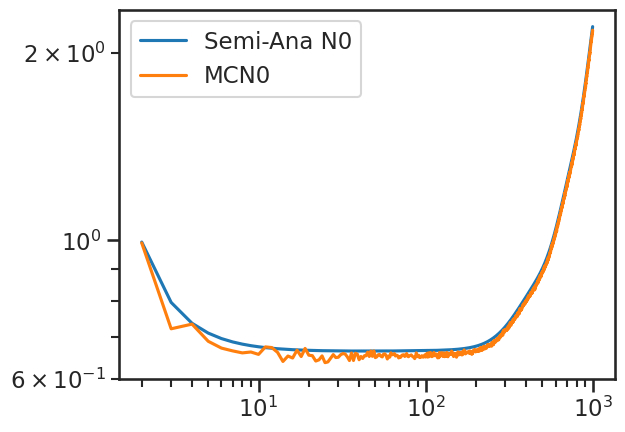

In [132]:
plt.loglog(ell, n0, label = 'Semi-Ana N0')
plt.loglog(ell, mcn0, label = 'MCN0')
# plt.ylim(1e-3, 1e1)
plt.legend()

In [121]:
cases = ['no_fore']

lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 2000
results_all_2000 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = [200, 500], lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment='SO_LAT_MASK')

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [00:15<00:00, 19.35it/s]


In [126]:
results_all_2000[2][0][-1] = 2*ss

In [143]:
import copy

In [144]:
results_test = copy.deepcopy(results_all_2000)

In [145]:
results_test[1][0] = results_all_2000[1][0][0:10]

In [142]:
results_all_2000[1][0]

300

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


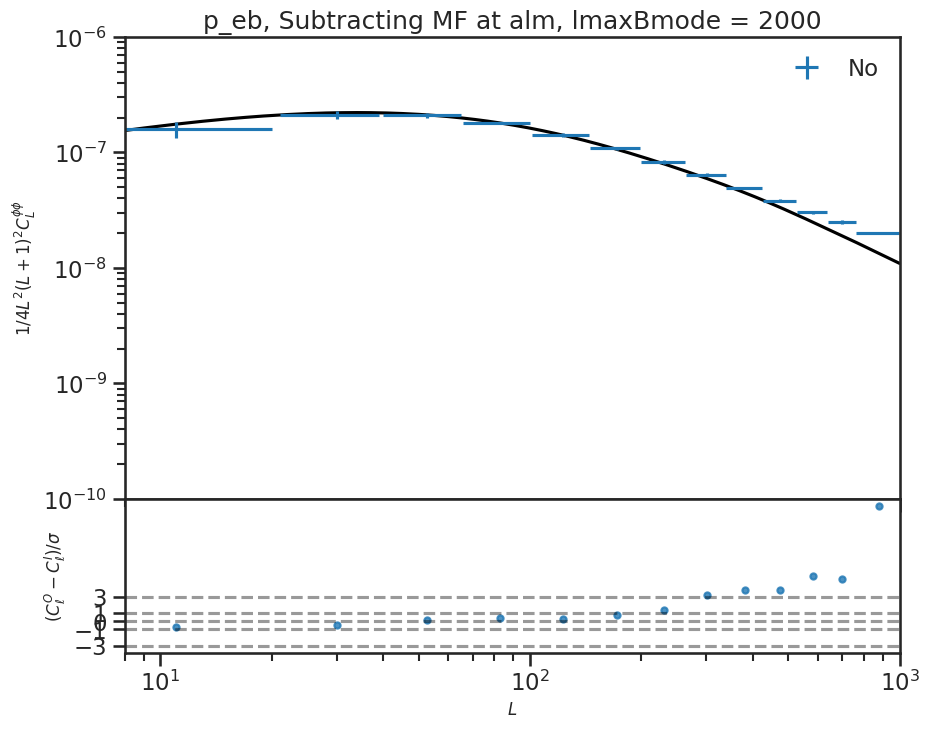

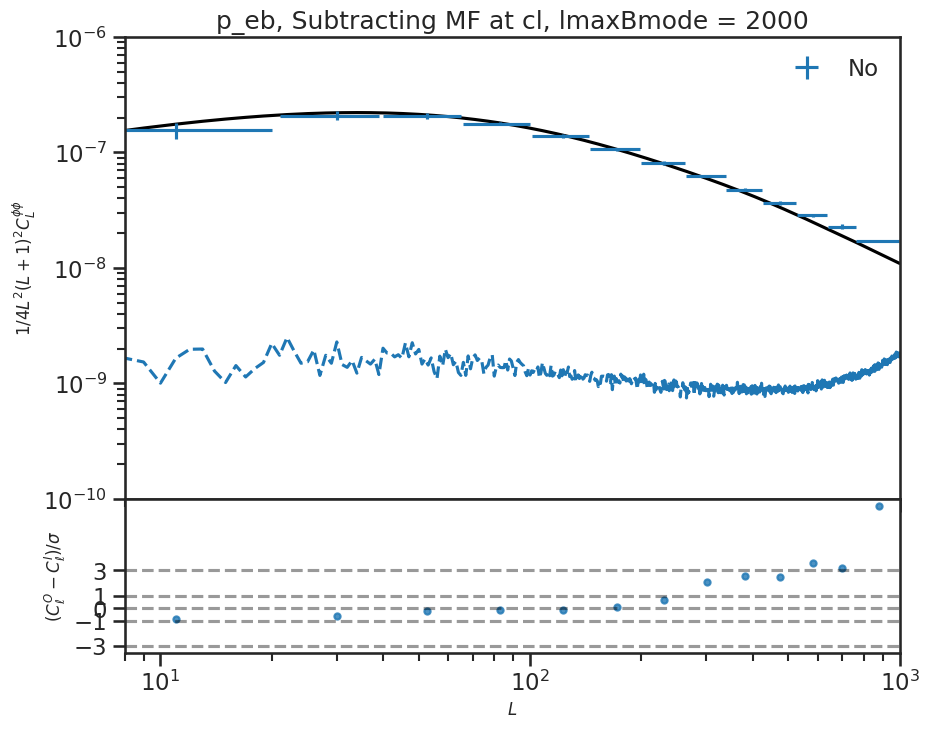

In [146]:
plot_errors_from_mf(cases, results_test, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, plot_mf_cl=True)

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


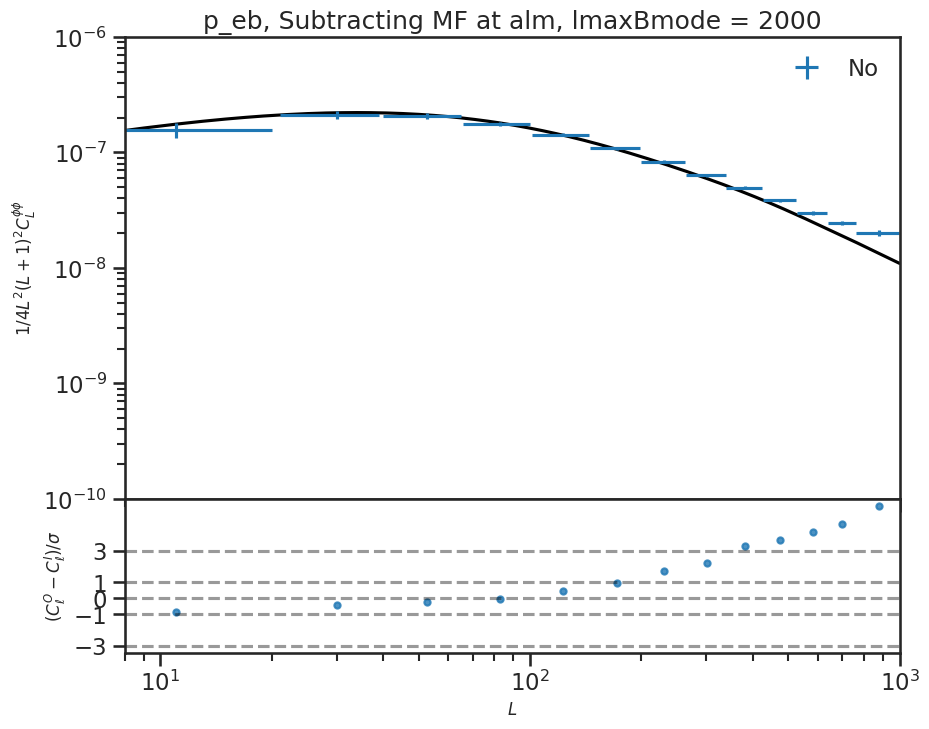

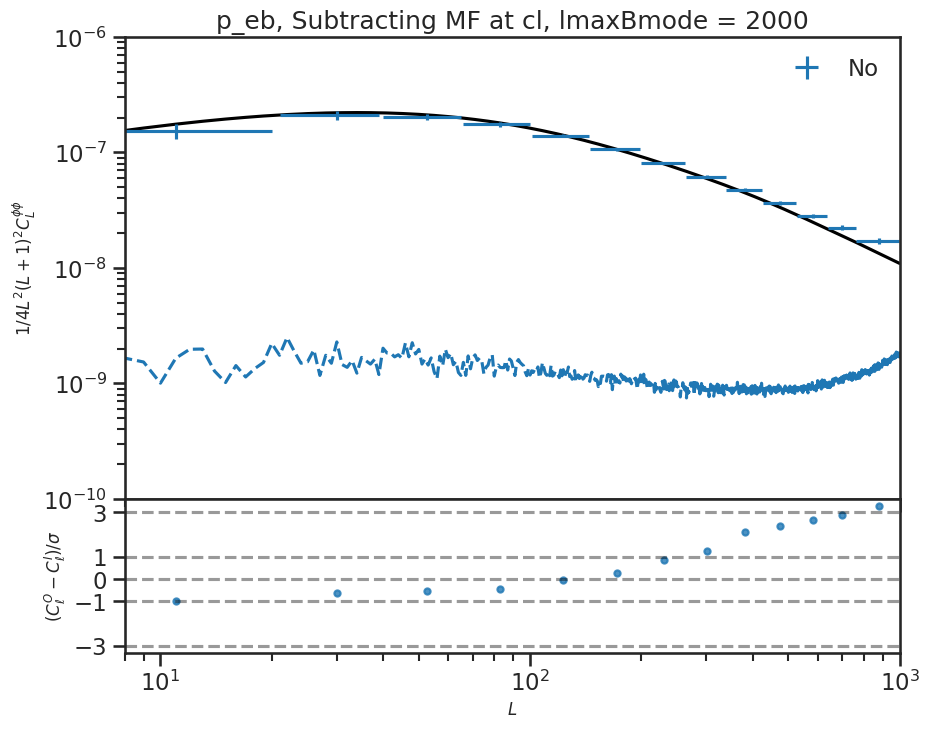

In [140]:
plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, plot_mf_cl=True)

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


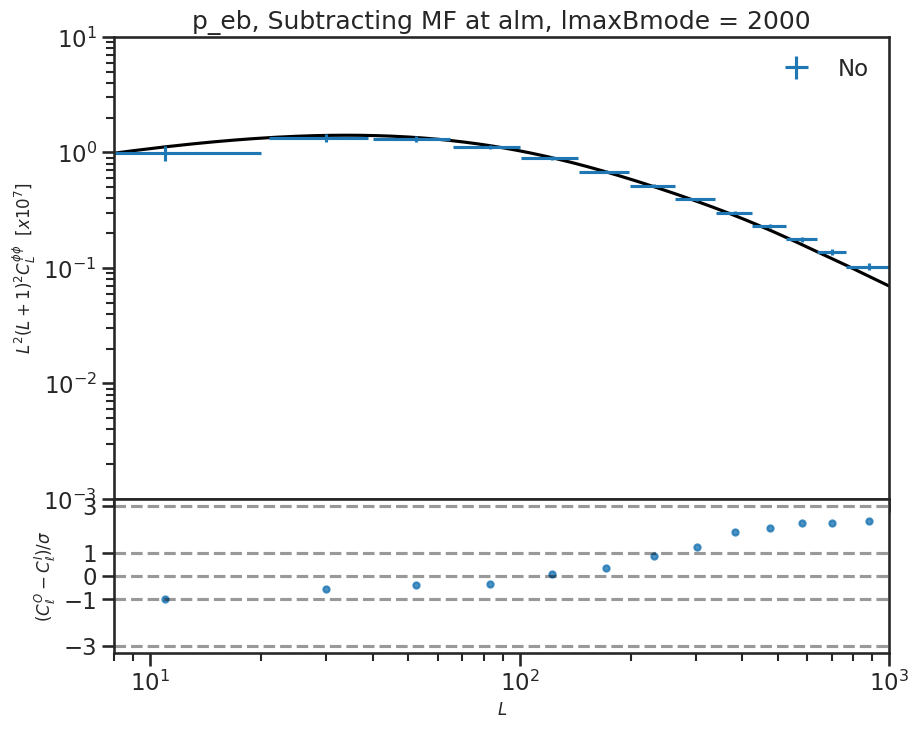

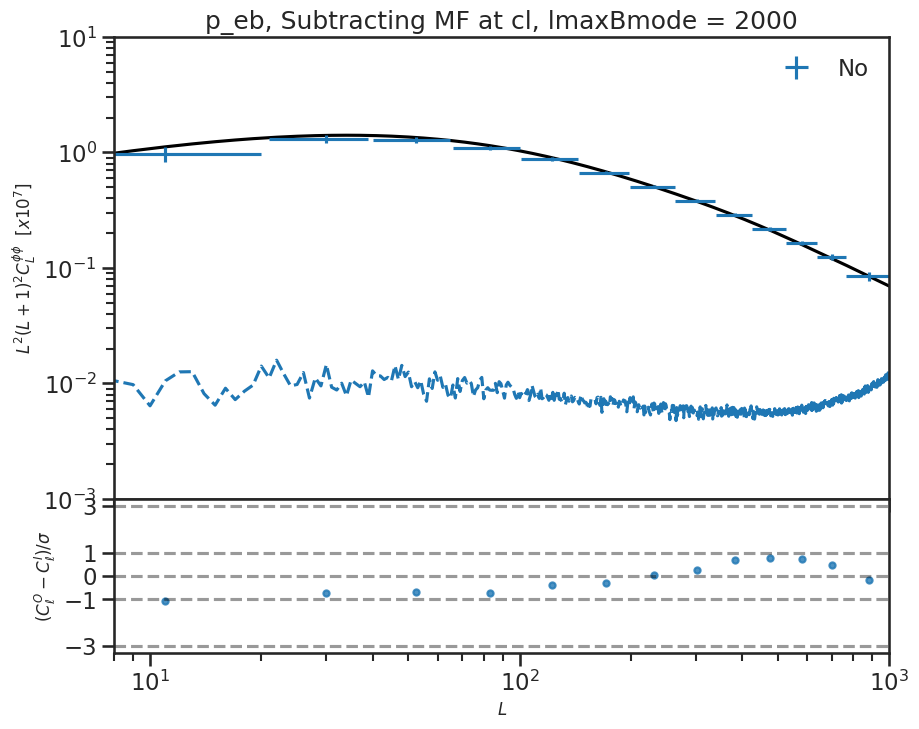

In [112]:
plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, plot_mf_cl=True)

### phi_lm check

In [101]:
qlm2_eb = hp.read_alm(dirs + 'qlms_dd/sim_peb_0200.fits')
qlm2_be = hp.read_alm(dirs + 'qlms_dd/sim_pbe_0200.fits')

qlm2 = qlm2_eb + qlm2_be

In [97]:
qlm1 = qlms_dd.get_sim_qlm('p_eb', 200, lmax = 1000)

In [102]:
cl_qlm1 = hp.alm2cl(qlm1)
cl_qlm2 = hp.alm2cl(qlm2)


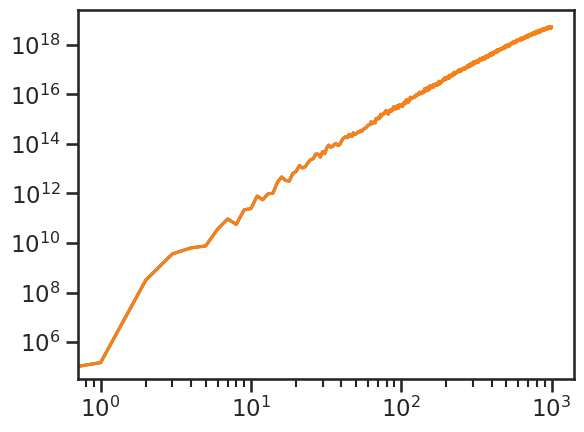

In [103]:

# plt.loglog(cl_phiphi)
plt.loglog(cl_qlm2/qcls_dd.fskies[11])
plt.loglog(cl_qlm1/qcls_dd.fskies[11])


### mean field check

In [48]:
mf1 = hp.read_alm(dirs + 'qlms_dd/simMF_k1pbe_564e6c76ba2cfaf91f8d4c646b98adf3cf659170.fits') #[::2]
mf2 = hp.read_alm(dirs + 'qlms_dd/simMF_k1pbe_8ca6edb5a5888f9eecac3ff776cd88ca624e0b76.fits')# [1::2]

mf3 = hp.read_alm(dirs + 'mean_field_p_eb/mf_200_p_eb.fits')

In [52]:
mf4 = qlms_dd.get_sim_qlm_mf('p_eb', range(0, 200))

 [00:00:05] calculating peb MF ---------> 99%
Cached  /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_N0_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000/qlms_dd/simMF_k1peb_3abe01fb3965aed8085e4b80e89b3ca3309dda47.fits
 [00:00:04] calculating pbe MF ---------> 99%
Cached  /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_N0_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000/qlms_dd/simMF_k1pbe_3abe01fb3965aed8085e4b80e89b3ca3309dda47.fits


In [53]:
cl_mf4 = hp.alm2cl(mf4)

In [49]:
cl_mf1 = hp.alm2cl(mf1)
cl_mf2 = hp.alm2cl(mf2)
cl_mf3 = hp.alm2cl(mf3)

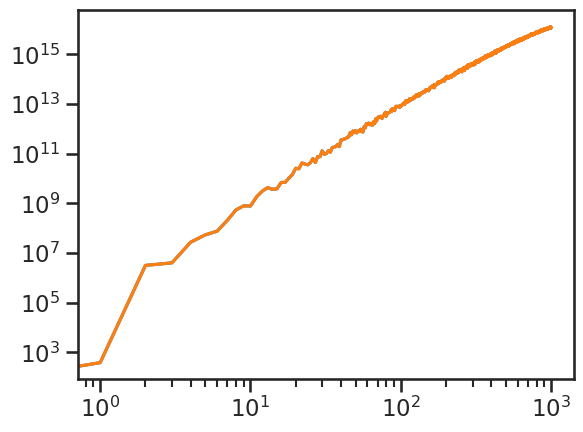

In [55]:
# plt.loglog(cl_mf1)
# plt.loglog(cl_mf2)
plt.loglog(cl_mf3)
plt.loglog(cl_mf4)

In [ ]:
def get_variance(results, fsky, subtract_mf = None, mf = None, Nsim_mf = None, return_mf_cl = False, from_fg_res = False):

    
    ell, qlms, nhl_data, qnorm = results[0], results[1], results[2][0], results[3]
    
    fsky = fsky
    weights_phi = qnorm[ell] ** 2 / fsky * w(ell)
    n0 = nhl_data[ell] * qnorm[ell] ** 2 * w(ell)
    
    nstart = Nsim_mf
    mf_alm = np.mean(qlms[:Nsim_mf], axis = 0)

    mf_cl = (hp.alm2cl(mf_alm)[ell])*weights_phi
    
    bins = [2, 21, 40, 66, 101, 145, 199, 264, 339, 426, 526, 638, 763, 1000]
    
    cleaned_my = []
    for i in range(nstart, len(qlms)):
        
        cleaned_my_i = (hp.alm2cl(qlms[i])[ell])*weights_phi - n0    
        ell_binned, cleaned_binned_i =  bin_cell(cleaned_my_i - mf_cl, lmax = 1000, bins = bins, ell_2=False)    
        cleaned_my.append(cleaned_binned_i)
        
    cleaned_mean = np.mean(cleaned_my, axis = 0)
    cleaned_std = np.std(cleaned_my, axis = 0)

    delta_ell = [(y - x)/2 - 0.5 for x, y in zip(bins[0:-1], bins[1:])]
    # 0.5 for visuallization 

    xdata = np.array(ell_binned)
    ydata = cleaned_mean[0]
    
    yerr = np.array([cleaned_std[0], cleaned_std[0]])
    xerr = np.array([delta_ell, delta_ell])
    
    if return_mf_cl:
        assert not from_fg_res, 'mean field and fg_res should not be estimated simultaneously.'
        return [xdata, ydata, xerr, yerr], mf_cl
    
    return [xdata, ydata, xerr, yerr]